______________________________________


In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../src"))
from utils.preprocess import *
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

dataset_path = "../../data/embryo/processed/atac_peaks_with_sequences_2000.csv"
# RAW: unlogged, unnormalized
X_train_raw, X_val_raw, X_test_raw, y_train_raw, y_val_raw, y_test_raw, y_raw, y_processed_raw = load_and_split_data(
    dataset_path,
    sequence_length=2000,
    log_transform_flag=False,
    normalize=None,
    drop_n_last_cols=5,
    train_frac=0.7,
    val_frac=0.1,
    test_frac=0.2
)

# RAW QUANTILE: unlogged, quantile normalized
X_train_raw_quant, X_val_raw_quant, X_test_raw_quant, y_train_raw_quant, y_val_raw_quant, y_test_raw_quant, y_raw_quant, y_processed_raw_quant = load_and_split_data(
    dataset_path,
    sequence_length=2000,
    log_transform_flag=False,
    normalize='norm',
    drop_n_last_cols=5,
    train_frac=0.7,
    val_frac=0.1,
    test_frac=0.2
)





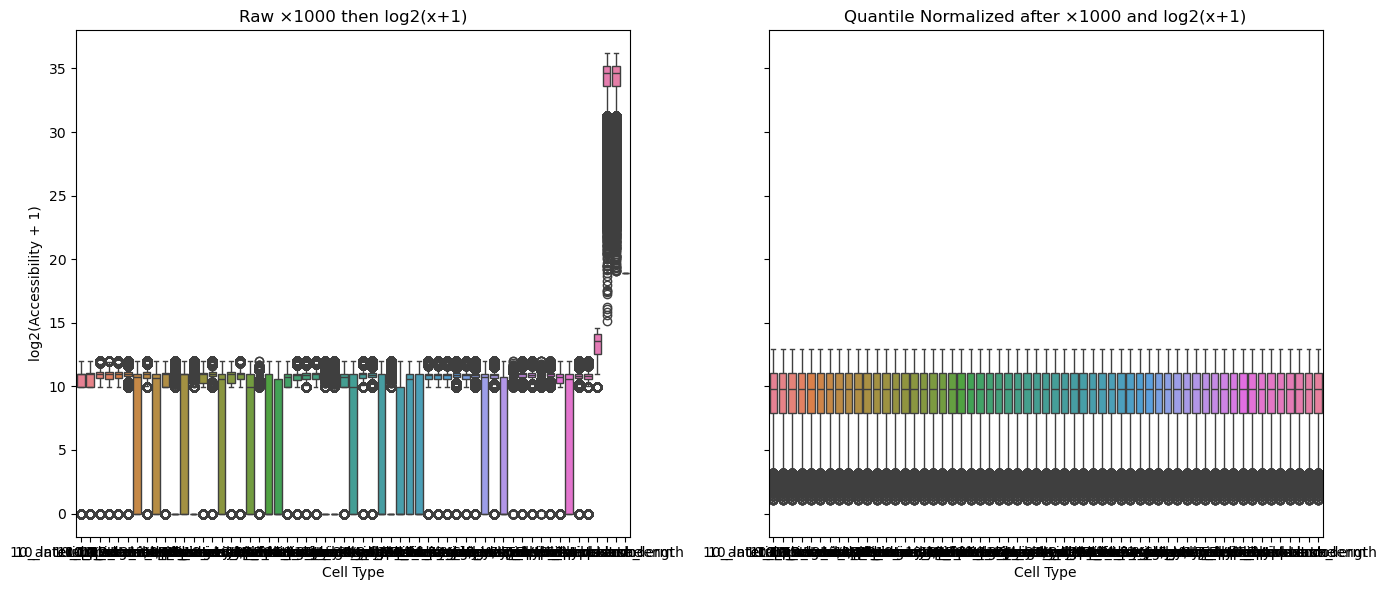

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/embryo/processed/atac_peaks_with_sequences_2000.csv")
df_numeric = df.select_dtypes(include=[np.number])

# Multiply by 1000 and log2(x + 1)
raw_scaled = np.log2(df_numeric * 1000 + 1)

# Quantile normalization function
def quantile_norm(x, axis=0):
    sorted_x = np.sort(x, axis=axis)
    meanx = np.mean(sorted_x, axis=axis-1)
    xqtrl = meanx[np.argsort(np.argsort(x, axis=axis), axis=axis)]
    return xqtrl

# Apply quantile normalization after log2 scaling
quant_normed = quantile_norm(raw_scaled.values, axis=0)
df_quant = pd.DataFrame(quant_normed, columns=raw_scaled.columns)

# Plot raw_scaled
plt.figure(figsize=(8, 6))
sns.boxplot(data=raw_scaled)
plt.title("Raw ×1000 then log2(x+1)")
plt.xlabel("Cell Type")
plt.ylabel("log2(Accessibility + 1)")
plt.tight_layout()
plt.show()


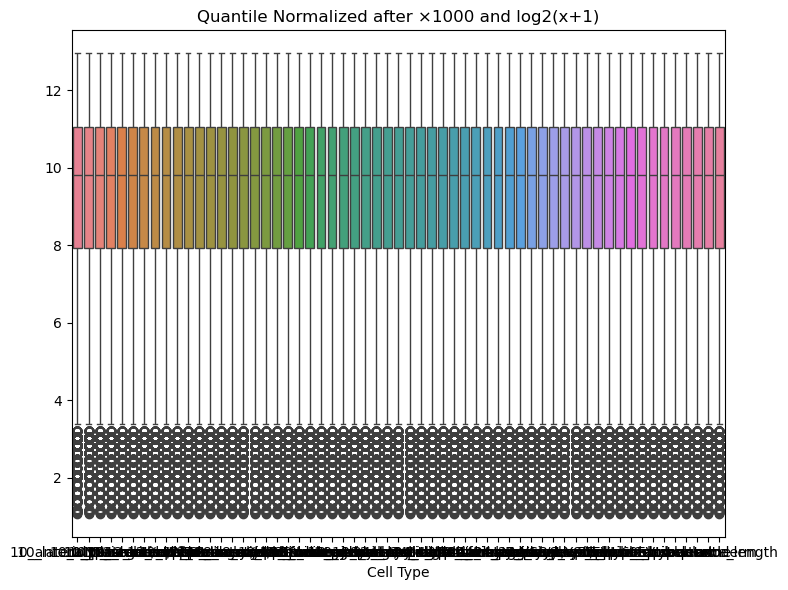

In [7]:

# Plot quantile normalized
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_quant)
plt.title("Quantile Normalized after ×1000 and log2(x+1)")
plt.xlabel("Cell Type")
plt.tight_layout()
plt.show()


In [2]:
import sys
import os
sys.path.append(os.path.abspath("../../src"))
from utils.preprocess import load_and_preprocess_data
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

csv_path = "../../data/embryo/processed/atac_peaks_with_sequences_2000.csv"

# Load and preprocess
df_raw_log2, df_quant_log2 = load_and_preprocess_data(csv_path)

# Plot distributions
plot_distributions(df_raw_log2, df_quant_log2)


NameError: name 'plot_distributions' is not defined

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

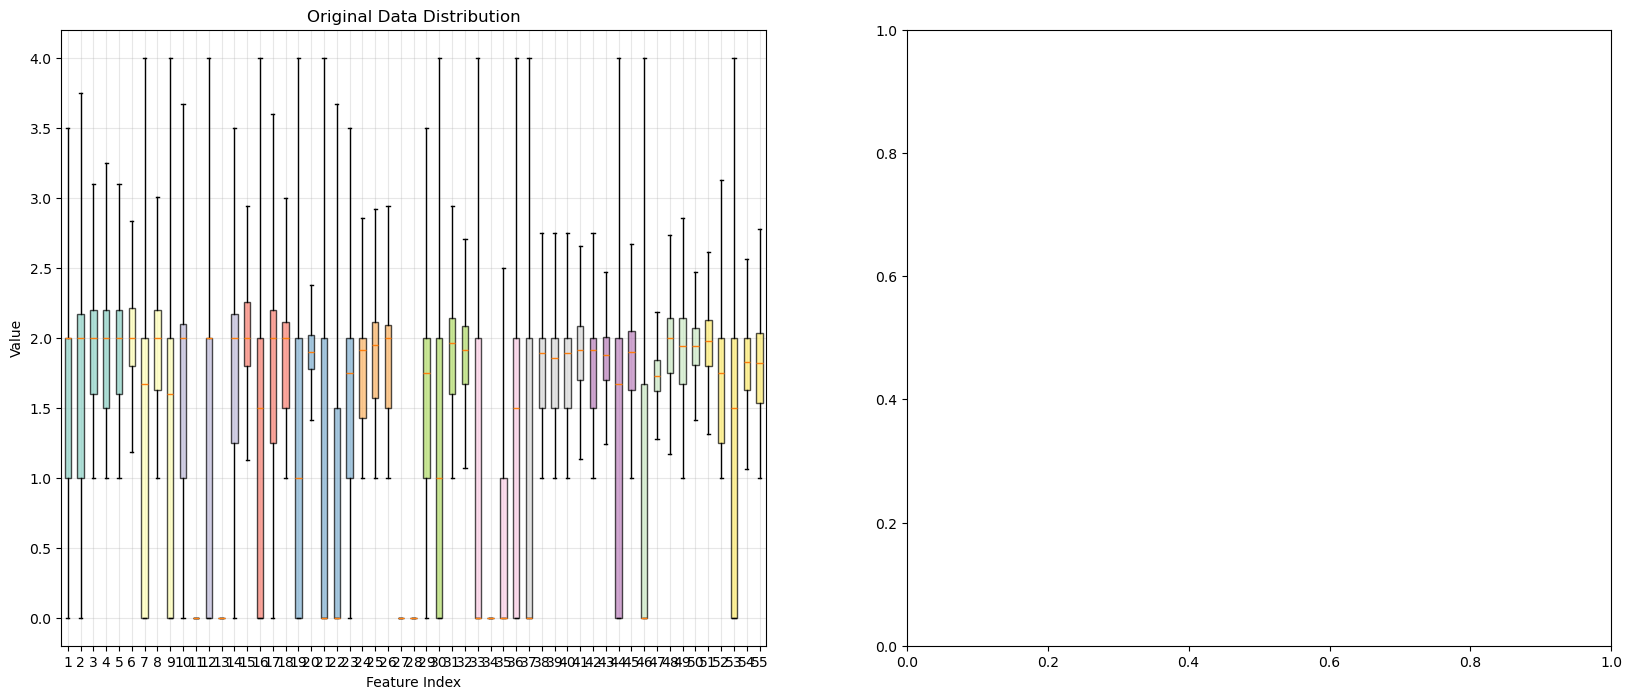

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

import sys
import os
sys.path.append(os.path.abspath("../../src"))
from utils.preprocess import quantile_norm
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np
# Apply custom quantile transformation
y_custom_qt = quantile_norm(y_raw, 0)

# Create comparison boxplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Original data boxplot
bp1 = axes[0].boxplot([y_raw[:, j] for j in range(y_raw.shape[1])], 
                      patch_artist=True, showfliers=False)
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Feature Index')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Color the boxes
colors1 = plt.cm.Set3(np.linspace(0, 1, len(bp1['boxes'])))
for patch, color in zip(bp1['boxes'], colors1):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Custom quantile transform boxplot
bp2 = axes[1].boxplot([y_custom_qt[:, j] for j in range(y_custom_qt.shape[0])], 
                      patch_artist=True, showfliers=False)
axes[1].set_title('Custom Quantile Transform Distribution')
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

# Color the boxes
colors2 = plt.cm.Set3(np.linspace(0, 1, len(bp2['boxes'])))
for patch, color in zip(bp2['boxes'], colors2):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

# Test uniformity for first 3 features
uniformity_results = {}
for i in range(min(3, y_custom_qt.shape[1])):
    uniformity_results[i] = kstest(y_custom_qt[:5000, i], 'uniform')[1]

print("Data Analysis Summary:")

print("\nUniformity Test Results (p-values > 0.05 = uniform):")
for feat, pvalue in uniformity_results.items():
    print(f"Feature {feat}: Custom QT p-value = {pvalue:.4f}")

In [3]:
X_train_raw_quant, X_val_raw_quant, y_train_raw_quant, y_val_raw_quant, y_raw_, y_processed_raw_quant,= load_and_split_data(
    dataset_path,
    sequence_length=2000, 
    log_transform_flag=False, 
    normalize='quantile', 
    drop_n_last_cols=5
)


In [11]:
# print shape of y_train and y_val
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
# print shape of y_raw and y_processed
print("y_raw shape:", y_raw.shape)
print("y_processed shape:", y_processed.shape)

y_train shape: torch.Size([304107, 55])
y_val shape: torch.Size([65951, 55])
y_raw shape: (370058, 55)
y_processed shape: (370058, 55)


In [17]:
# print differences between y_raw and y_processed
print("Differences between y_raw and y_processed:")
print("y_raw mean:", y_raw.mean(axis=0))
print("y_processed mean:", y_processed.mean(axis=0))

Differences between y_raw and y_processed:
y_raw mean: [1.5602757  1.5443723  1.8369725  1.7791051  1.8401138  2.0006008
 1.3034337  1.8359835  1.3220843  1.5869119  0.39771122 1.5172092
 0.17323254 1.6920315  2.0119755  1.2610501  1.6941702  1.8110143
 1.1363106  1.8953547  0.8259497  0.64682823 1.5024873  1.6872314
 1.8296485  1.7706114  0.19838406 0.4819907  1.4594643  1.1754848
 1.8438537  1.8638805  0.7294005  0.14013323 0.5420301  1.211648
 0.7820538  1.7252439  1.7746497  1.7470895  1.8904349  1.7134546
 1.866742   1.340258   1.8294232  0.68458325 1.7300771  1.9347459
 1.8839182  1.9357829  1.9587243  1.6227095  1.3159534  1.8252918
 1.8064858 ]
y_processed mean: [1.5602696  1.5443815  1.8370205  1.7791469  1.8401895  2.0006392
 1.3034078  1.8360205  1.3220569  1.5869064  0.39771128 1.5171959
 0.17323266 1.6920449  2.0120332  1.2610216  1.69418    1.8110505
 1.1363031  1.8953627  0.8259511  0.64683056 1.5024672  1.6872423
 1.8296971  1.770638   0.19838431 0.48199186 1.4594389  1

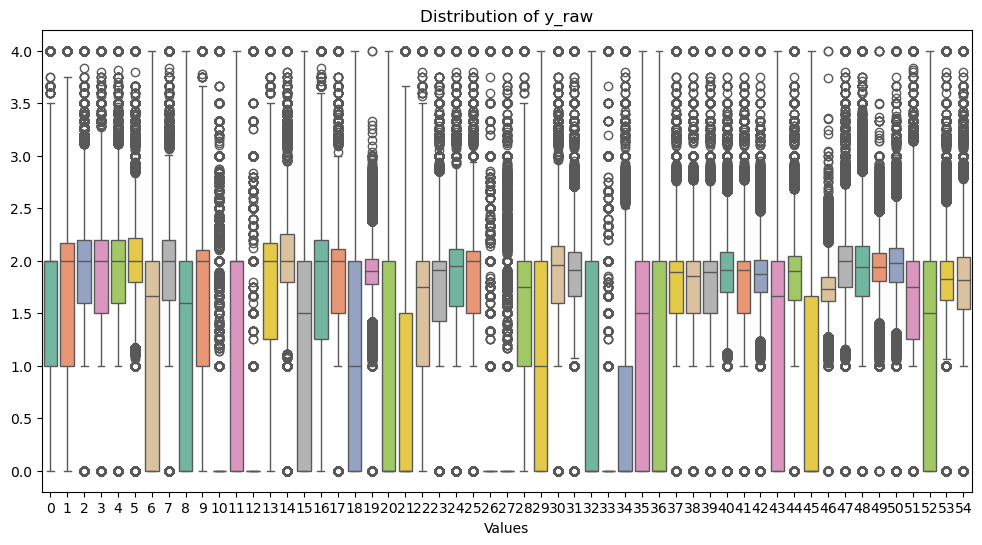

In [20]:
# plot in boxplots the distributions of y_raw and y_processed for each column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=y_raw, palette='Set2')
plt.title('Distribution of y_raw')
plt.xlabel('Values')
plt.show()

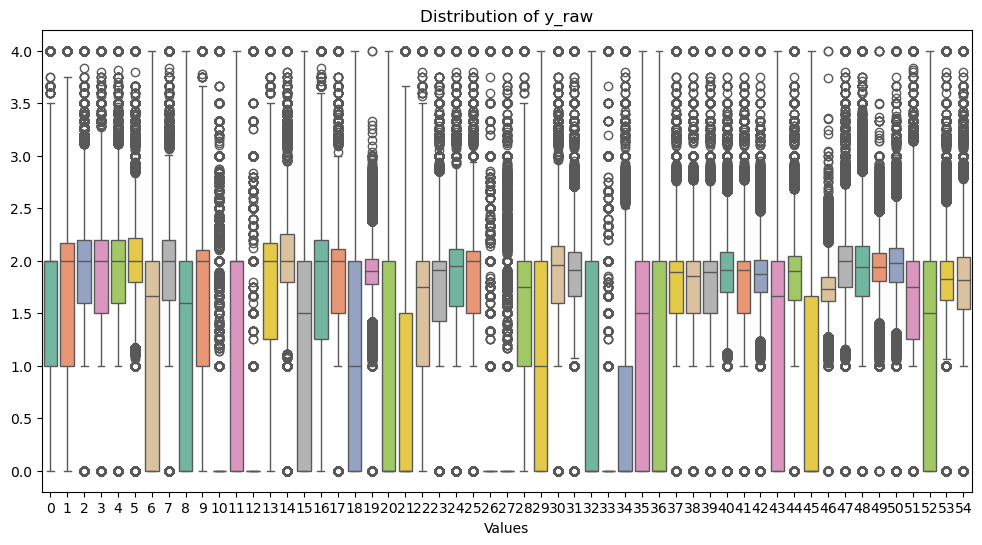

In [21]:
# plot in boxplots the distributions of y_raw and y_processed for each column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=y_processed, palette='Set2')
plt.title('Distribution of y_raw')
plt.xlabel('Values')
plt.show()